In [3]:
import numpy as np
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit import Aer, IBMQ

In [9]:
def increment_gate(qc, q, qcoin):
    qc.ccx(qcoin, q[0], q[1])
    qc.cx(qcoin, q[0])
    return qc

def decrement_gate(qc, q, qcoin):
    qc.x(q)
    qc.x(qcoin)
    increment_gate(qc, q, qcoin)
    qc.x(qcoin)
    qc.x(q)
    return qc

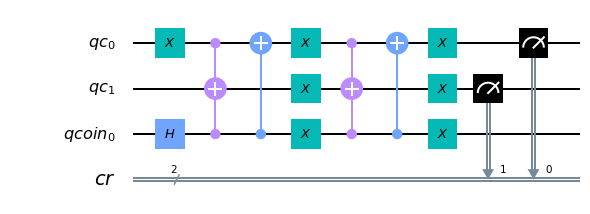

In [10]:
n = 2
qnodes = QuantumRegister(n,'qc')
qcoin = QuantumRegister(1,'qcoin')
cnodes = ClassicalRegister(n,'cr')

qc = QuantumCircuit(qnodes, qcoin, cnodes)

# Apply Coin
qc.h(qcoin[0])

# Initial state
qc.x(0)

increment_gate(qc, qnodes, qcoin)
decrement_gate(qc, qnodes, qcoin)
qc.measure(qnodes, cnodes)

qc.draw('mpl')

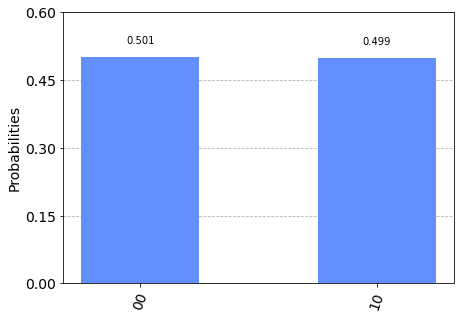

In [12]:
# Single Shot, just to test!

import matplotlib as mpl

backend = Aer.get_backend("qasm_simulator")
result = execute(qc, backend=backend).result()
plot_histogram(result.get_counts())

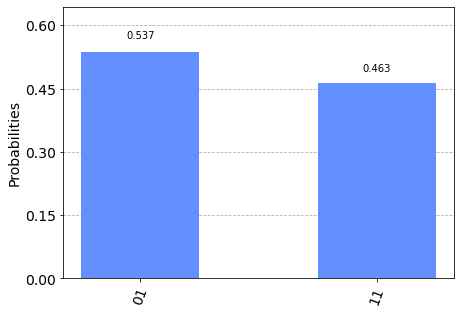

In [26]:
# Here goes the magic
n = 2
qnodes = QuantumRegister(n,'qc')
qcoin = QuantumRegister(1,'qcoin')
cnodes = ClassicalRegister(n,'cr')
qc = QuantumCircuit(qnodes, qcoin, cnodes)

steps = 51

def runQWC(qc, steps):
    for i in range(steps):
        qc.h(qcoin[0])
        increment_gate(qc, qnodes, qcoin)
        decrement_gate(qc, qnodes, qcoin)
        qc.measure(qnodes, cnodes)

    return qc

qc = runQWC(qc, steps)

backend = Aer.get_backend("qasm_simulator")
result = execute(qc, backend=backend).result()
plot_histogram(result.get_counts())